In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import squarify
from scipy.stats.stats import spearmanr

# Read Tables into Data frames

In [2]:
geolocation_df = pd.read_csv('dataset/olist_geolocation_dataset.csv')
customers_df = pd.read_csv('dataset/olist_customers_dataset.csv')
order_items_df = pd.read_csv('dataset/olist_order_items_dataset.csv')
order_payments_df = pd.read_csv('dataset/olist_order_payments_dataset.csv')
order_reviews_df = pd.read_csv('dataset/olist_order_reviews_dataset.csv')
orders_df = pd.read_csv('dataset/olist_orders_dataset.csv')
products_df = pd.read_csv('dataset/olist_products_dataset.csv')
sellers_df = pd.read_csv('dataset/olist_sellers_dataset.csv')
category_translation_df = pd.read_csv('dataset/product_category_name_translation.csv')

Check if the number of rows and columns match the original dataset

In [3]:
print('geolocation_df', geolocation_df.shape)
print('customers_df', customers_df.shape)
print('order_items_df', order_items_df.shape)
print('order_payments_df', order_payments_df.shape)
print('order_reviews_df', order_reviews_df.shape)
print('orders_df', orders_df.shape)
print('products_df', products_df.shape)
print('sellers_df', sellers_df.shape)
print('category_translation_df', category_translation_df.shape)

geolocation_df (1000163, 5)
customers_df (99441, 5)
order_items_df (112650, 7)
order_payments_df (103886, 5)
order_reviews_df (100000, 7)
orders_df (99441, 8)
products_df (32951, 9)
sellers_df (3095, 4)
category_translation_df (71, 2)


View a sample of the data

In [4]:
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [5]:
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [6]:
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [7]:
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [8]:
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [9]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [10]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [11]:
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [12]:
category_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


Missing Values

In [13]:
print(order_reviews_df.isnull().mean(axis = 0) * 100)
print(order_reviews_df.isnull().sum(axis = 0))

review_id                   0.000
order_id                    0.000
review_score                0.000
review_comment_title       88.285
review_comment_message     58.247
review_creation_date        0.000
review_answer_timestamp     0.000
dtype: float64
review_id                      0
order_id                       0
review_score                   0
review_comment_title       88285
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64


In [14]:
print(orders_df.isnull().mean(axis = 0) * 100)
print(orders_df.isnull().sum(axis = 0))

order_id                         0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.160899
order_delivered_carrier_date     1.793023
order_delivered_customer_date    2.981668
order_estimated_delivery_date    0.000000
dtype: float64
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


In [15]:
print(products_df.isnull().mean(axis = 0) * 100)
print(products_df.isnull().sum(axis = 0))

product_id                    0.000000
product_category_name         1.851234
product_name_lenght           1.851234
product_description_lenght    1.851234
product_photos_qty            1.851234
product_weight_g              0.006070
product_length_cm             0.006070
product_height_cm             0.006070
product_width_cm              0.006070
dtype: float64
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64


# Insights

## States sorted by number of orders

An interesting approach to build context to this will be add the population of each of these states to see if the number of orders from each state is proportional to the population of citizens in each state.


NB: It was (remember to add population data later)

In [16]:
grouped = customers_df.groupby('customer_state')['customer_id'].count().reset_index()
grouped.rename(columns = {'customer_id':'order_count'}, inplace=True)
grouped = grouped.sort_values('order_count', ascending=False)
grouped.head()

,customer_state,order_count
25,SP,41746
18,RJ,12852
10,MG,11635
22,RS,5466
17,PR,5045


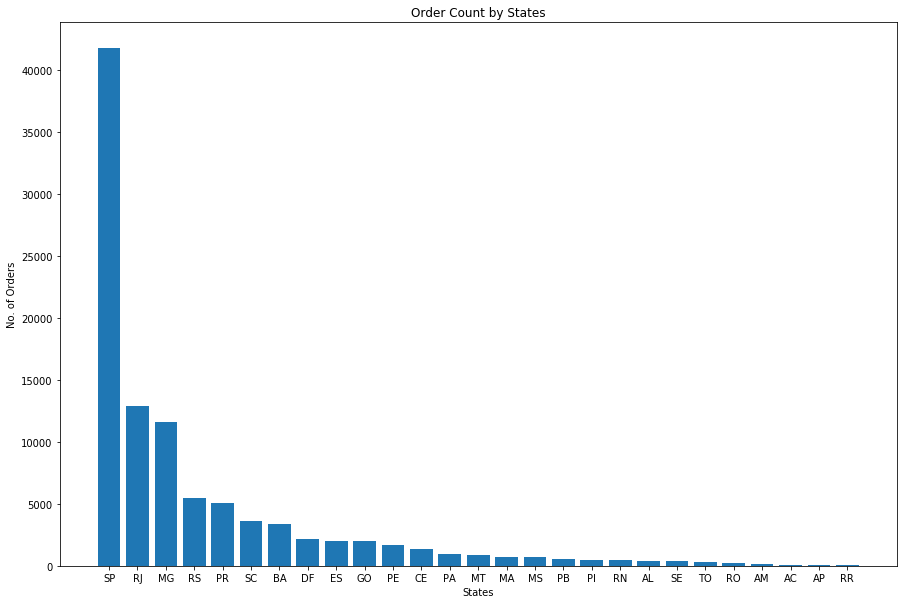

In [17]:
plt.figure(figsize=(15,10))
plt.bar(grouped.customer_state, grouped.order_count)
plt.title("Order Count by States")
plt.xlabel("States")
plt.ylabel("No. of Orders")
plt.show()

In [18]:
grouped['top_state'] = grouped.apply(lambda x: (x['customer_state'] if x['order_count'] >= 10000 else 'Others'), axis = 1)

<function matplotlib.pyplot.show(*args, **kw)>

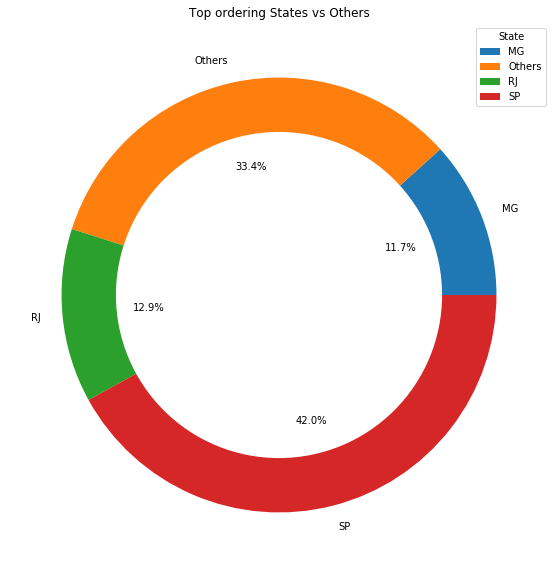

In [19]:
grouped = grouped.groupby('top_state')['order_count'].sum().reset_index()
plt.figure(figsize=(15,10))
plt.pie(grouped.order_count, labels=grouped.top_state, autopct='%1.1f%%')
plt.legend(loc='best')
plt.legend(title="State")
plt.title("Top ordering States vs Others")


circle = plt.Circle(xy=(0,0), radius = 0.75, facecolor='white')
plt.gca().add_artist(circle)
plt.show

Our first bar graph "Order Count by States" shows us the number of orders from each state, while our donut chart shows us the "Top ordering states" (which in this case is states with atleast 10,000 orders.

We can see that São Paulo (SP) acounts for the largest number of orders which is not surprising giving that it is the most populated state in brazil and accounts for 20% of the population.

We also see that Minas Gerais and Rio de Janeiro are the next two largest states in terms on numbers of orders which is also not surprising as they account for 10% of the brazilian population

## Customers sorted by number of orders

In [20]:
grouped = customers_df.groupby('customer_unique_id')['customer_id'].count().reset_index()
grouped.rename(columns = {'customer_id':'order_count'}, inplace=True)
grouped = grouped.sort_values('order_count', ascending=False)
grouped.head()

,customer_unique_id,order_count
52973,8d50f5eadf50201ccdcedfb9e2ac8455,17
23472,3e43e6105506432c953e165fb2acf44c,9
37797,6469f99c1f9dfae7733b25662e7f1782,7
76082,ca77025e7201e3b30c44b472ff346268,7
10354,1b6c7548a2a1f9037c1fd3ddfed95f33,7


In [21]:
grouped1 = grouped.head(10)
grouped1 = grouped1.sort_values('order_count', ascending=True)


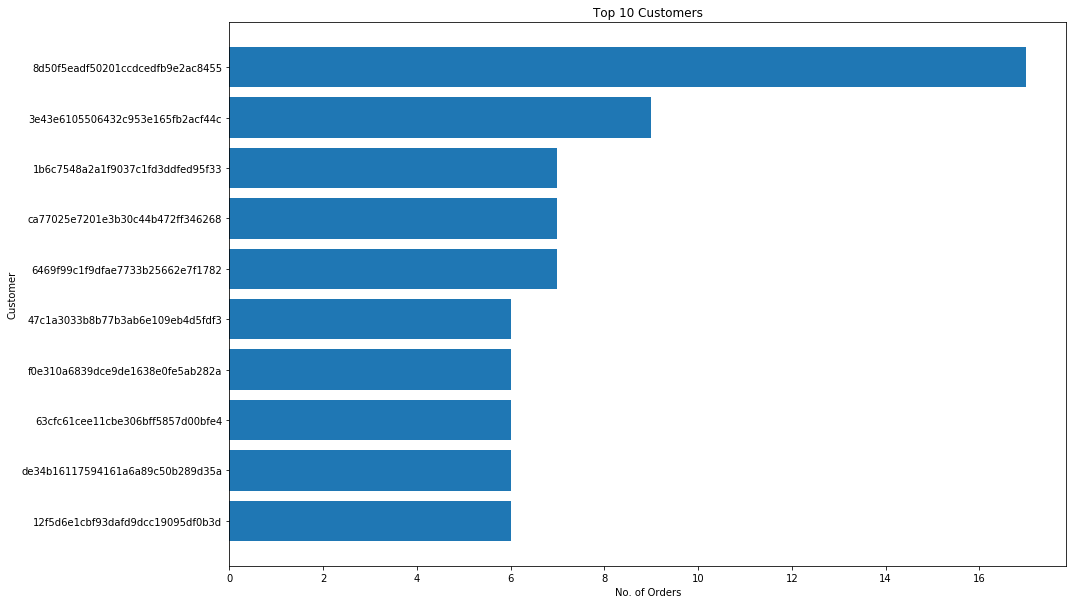

In [22]:
plt.figure(figsize=(15,10))
plt.barh(grouped1.customer_unique_id, grouped1.order_count)
plt.title("Top 10 Customers")
plt.xlabel("No. of Orders")
plt.ylabel("Customer")
plt.show()

Since there are a lot of customers we can't visualize all their orders. However, we can look at the customers with the largest number of orders and we see that one customer stands out at having more than double the others.

## Temporal

We inspect the orders data which has temporal features (Time data) we can use this to see when customers are making the most purchases or expecting their deliveries. Is it christmas, new years, easter etc


NB: A good way to add context to this would be to see what type of items are the top selling during different months of sales

In [23]:
orders_df['purchase_month']= pd.to_datetime(orders_df.order_purchase_timestamp).dt.to_period('m')
orders_df['estimated_delivery_month']= pd.to_datetime(orders_df.order_estimated_delivery_date).dt.to_period('m')

In [24]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_month,estimated_delivery_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,2018-07,2018-08
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,2018-08,2018-09
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,2017-11,2017-12
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2018-02,2018-02


In [25]:
orders_df.dtypes

order_id                            object
customer_id                         object
order_status                        object
order_purchase_timestamp            object
order_approved_at                   object
order_delivered_carrier_date        object
order_delivered_customer_date       object
order_estimated_delivery_date       object
purchase_month                   period[M]
estimated_delivery_month         period[M]
dtype: object

In [26]:
grouped = orders_df.groupby('purchase_month')['customer_id'].count().reset_index()
grouped.rename(columns = {'customer_id':'order_count'}, inplace=True)
grouped = grouped.sort_values('purchase_month', ascending=True)
grouped.head()

,purchase_month,order_count
0,2016-09,4
1,2016-10,324
2,2016-12,1
3,2017-01,800
4,2017-02,1780


In [27]:
#convert purchase month to datetime format so it can be plotted
grouped['purchase_month2'] = grouped.purchase_month.values.astype('datetime64[M]')

In [28]:
grouped

,purchase_month,order_count,purchase_month2
0,2016-09,4,2016-09-01
1,2016-10,324,2016-10-01
2,2016-12,1,2016-12-01
3,2017-01,800,2017-01-01
4,2017-02,1780,2017-02-01
5,2017-03,2682,2017-03-01
6,2017-04,2404,2017-04-01
7,2017-05,3700,2017-05-01
8,2017-06,3245,2017-06-01
9,2017-07,4026,2017-07-01


c:\users\rigz\documents\analytics\brazilianecommerce\brazilianecommerce\venv\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


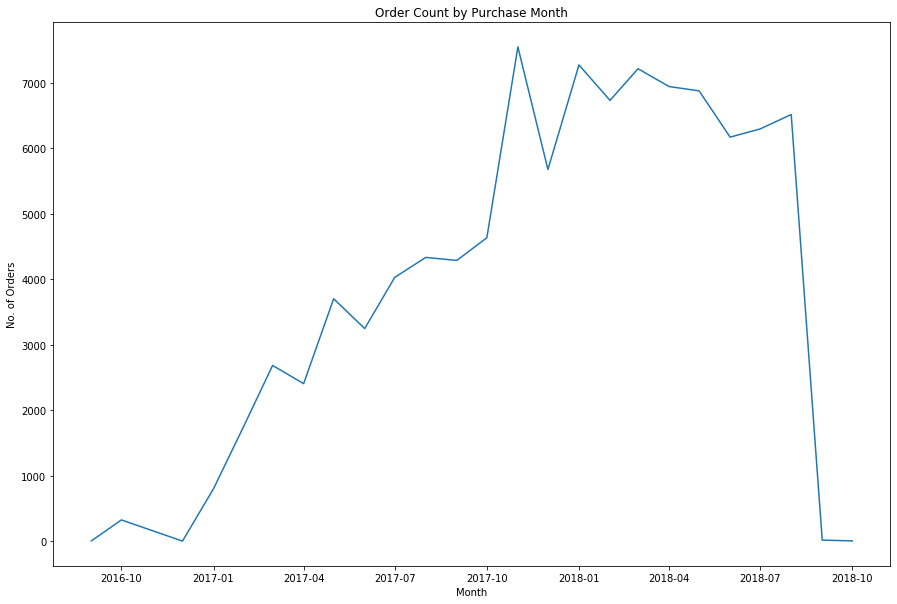

In [29]:
plt.figure(figsize=(15,10))
plt.plot(grouped.purchase_month2, grouped.order_count)
plt.title("Order Count by Purchase Month")
plt.xlabel("Month")
plt.ylabel("No. of Orders")
plt.show()

From our visualization of the Purchase month, we can see that the peak period for purchases was during the holiday periods Especially (Christmas and New Years) which is to be expected as customers may be purchasing gifts for friends and family or taking advantage of holiday promos.

In [30]:
grouped = orders_df.groupby('estimated_delivery_month')['customer_id'].count().reset_index()
grouped.rename(columns = {'customer_id':'order_count'}, inplace=True)
grouped = grouped.sort_values('estimated_delivery_month', ascending=True)
grouped.head()

,estimated_delivery_month,order_count
0,2016-09,1
1,2016-10,6
2,2016-11,171
3,2016-12,148
4,2017-01,3


In [31]:
#convert estimated delivery month to datetime format so it can be plotted
grouped['estimated_delivery_month2'] = grouped.estimated_delivery_month.values.astype('datetime64[M]')

In [32]:
grouped

,estimated_delivery_month,order_count,estimated_delivery_month2
0,2016-09,1,2016-09-01
1,2016-10,6,2016-10-01
2,2016-11,171,2016-11-01
3,2016-12,148,2016-12-01
4,2017-01,3,2017-01-01
5,2017-02,316,2017-02-01
6,2017-03,2801,2017-03-01
7,2017-04,2235,2017-04-01
8,2017-05,3037,2017-05-01
9,2017-06,3639,2017-06-01


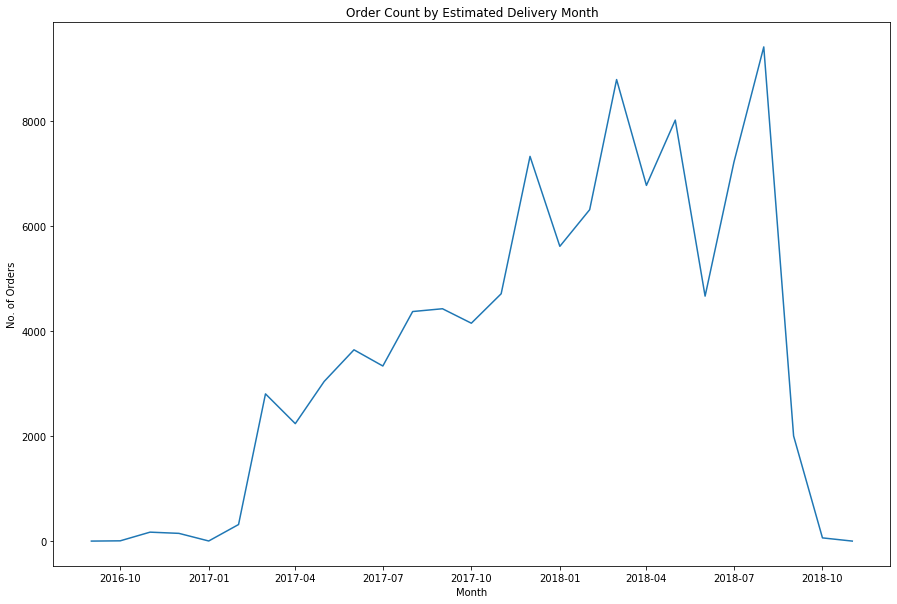

In [33]:
plt.figure(figsize=(15,10))
plt.plot(grouped.estimated_delivery_month2, grouped.order_count)
plt.title("Order Count by Estimated Delivery Month")
plt.xlabel("Month")
plt.ylabel("No. of Orders")
plt.show()

Adding more context to our purchase month visualisation, we can see that shoppers are buying gifts expected to arrive in time for the Holidays such as christmas and easter. Also, brazil celebrates Independence day in September which might explain the spike around August as there may have been promos as well as gifts and other things being bought for the celebration

# Products

Combine the Length, Width and Height of each product to easily note larger vs smaller items

In [34]:
products_df['volume'] = products_df.product_length_cm * products_df.product_height_cm * products_df.product_width_cm
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,volume
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,2240.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,10800.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,2430.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,2704.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,4420.0


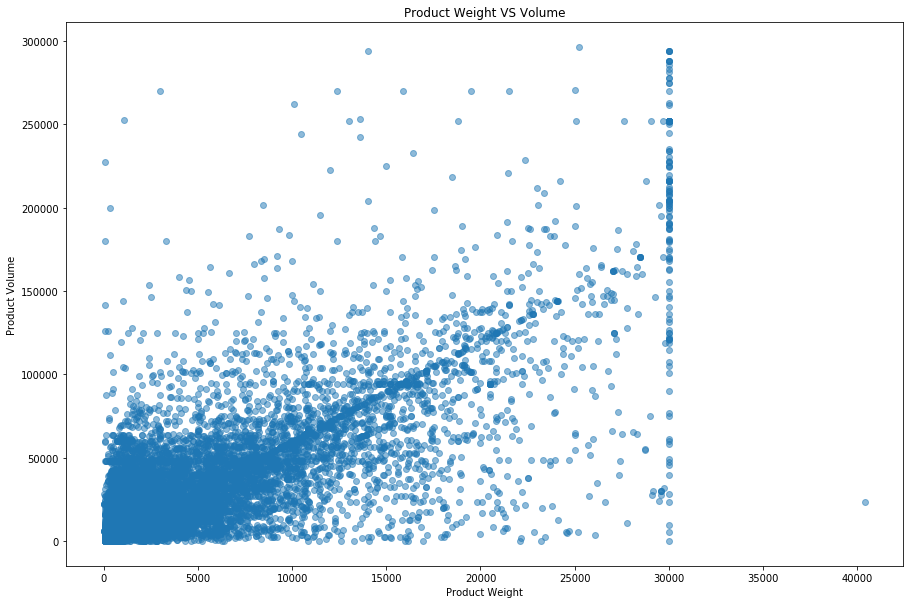

In [35]:
plt.figure(figsize=(15,10))
plt.scatter(products_df.product_weight_g,products_df.volume, alpha=0.5)
plt.title('Product Weight VS Volume')
plt.xlabel('Product Weight')
plt.ylabel('Product Volume')
plt.show()

From our scatter plot we can see having a larger weight does not mean having a large volume (occupying space)

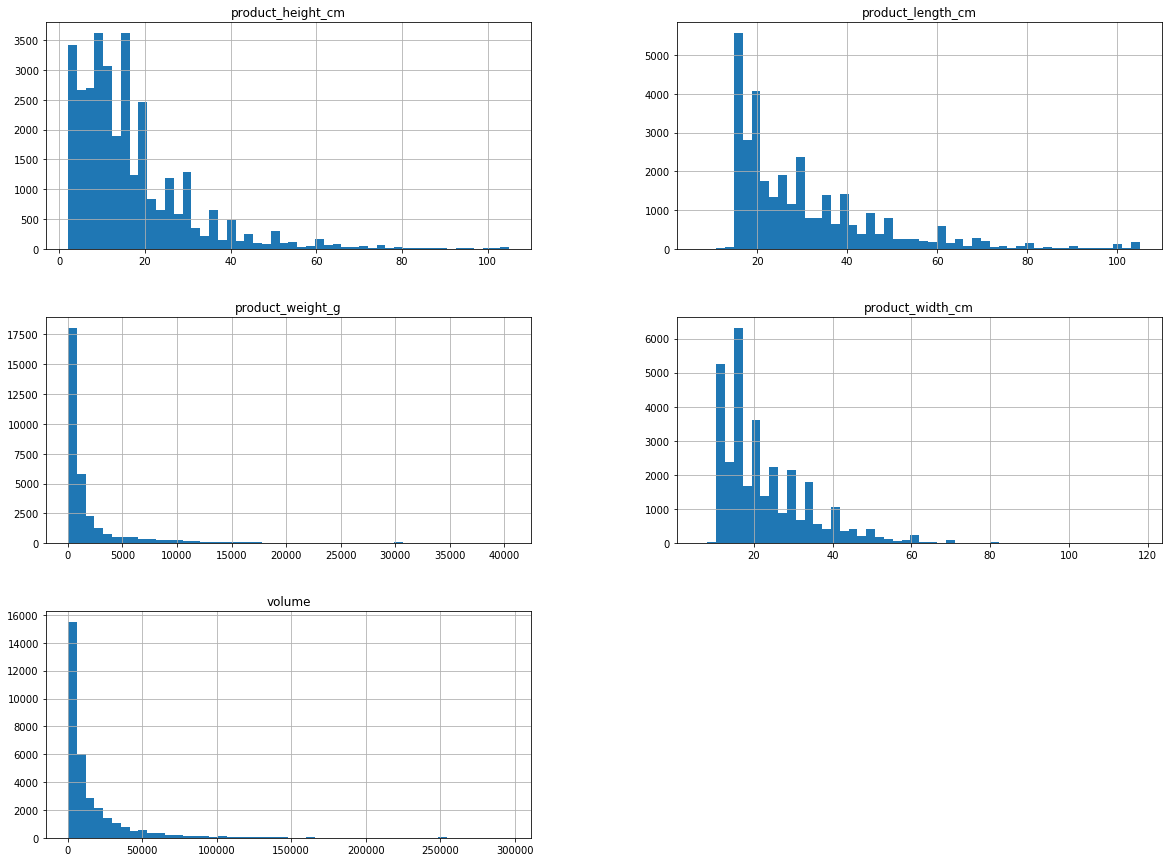

In [36]:
products_df[['product_weight_g','product_length_cm','product_height_cm','product_width_cm','volume']].hist(bins=50,figsize=(20,15))
plt.show()

In [37]:
cols = list(products_df[['product_weight_g','product_length_cm','product_height_cm','product_width_cm','volume']].columns)

In [38]:
spearmanr(products_df.product_weight_g,products_df.volume, nan_policy='omit')

SpearmanrResult(correlation=0.7525608818268783, pvalue=0.0)

We notice that the product weight and volume are correlated and using spearmans r we can see this correlation is statistically significant given that the p value is less than 0.05